# Sentiment Analysis

## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [76]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('expanded_corpus2.pkl')


In [77]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
!pip install  TextBlob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


,transcript,full_name,polarity,subjectivity
George,© 2024 Scraps from the Loft. All rights reser...,Louis C.K.,0.562500,0.350000
Jeselnik,[crowd cheering] Thank you all for coming to t...,Dave Chappelle,0.075116,0.535118
Matthew,"In his second hour-long comedy special, “Matth...",Ricky Gervais,0.094150,0.523452
Nate,"Your Friend, Nate Bargatze (2024)\nGenre: Come...",Bo Burnham,0.107638,0.476870
Nathaniel,"Original air date: October 28, 2023 Ladies and...",Bill Burr,0.081754,0.525686
Neal,[dark music playing] [Neal] So if you’re watch...,Jim Jefferies,0.069743,0.496575
Peter,[audience cheering and applauding] Hello! Hell...,John Mulaney,0.138919,0.504630
Shane,"Shane Gillis’ debut stand-up comedy special, r...",Hasan Minhaj,0.081786,0.521253
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong,0.073699,0.483335
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik,0.063952,0.557994


C:\Users\adity\AppData\Local\Temp\ipykernel_23196\589365931.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)


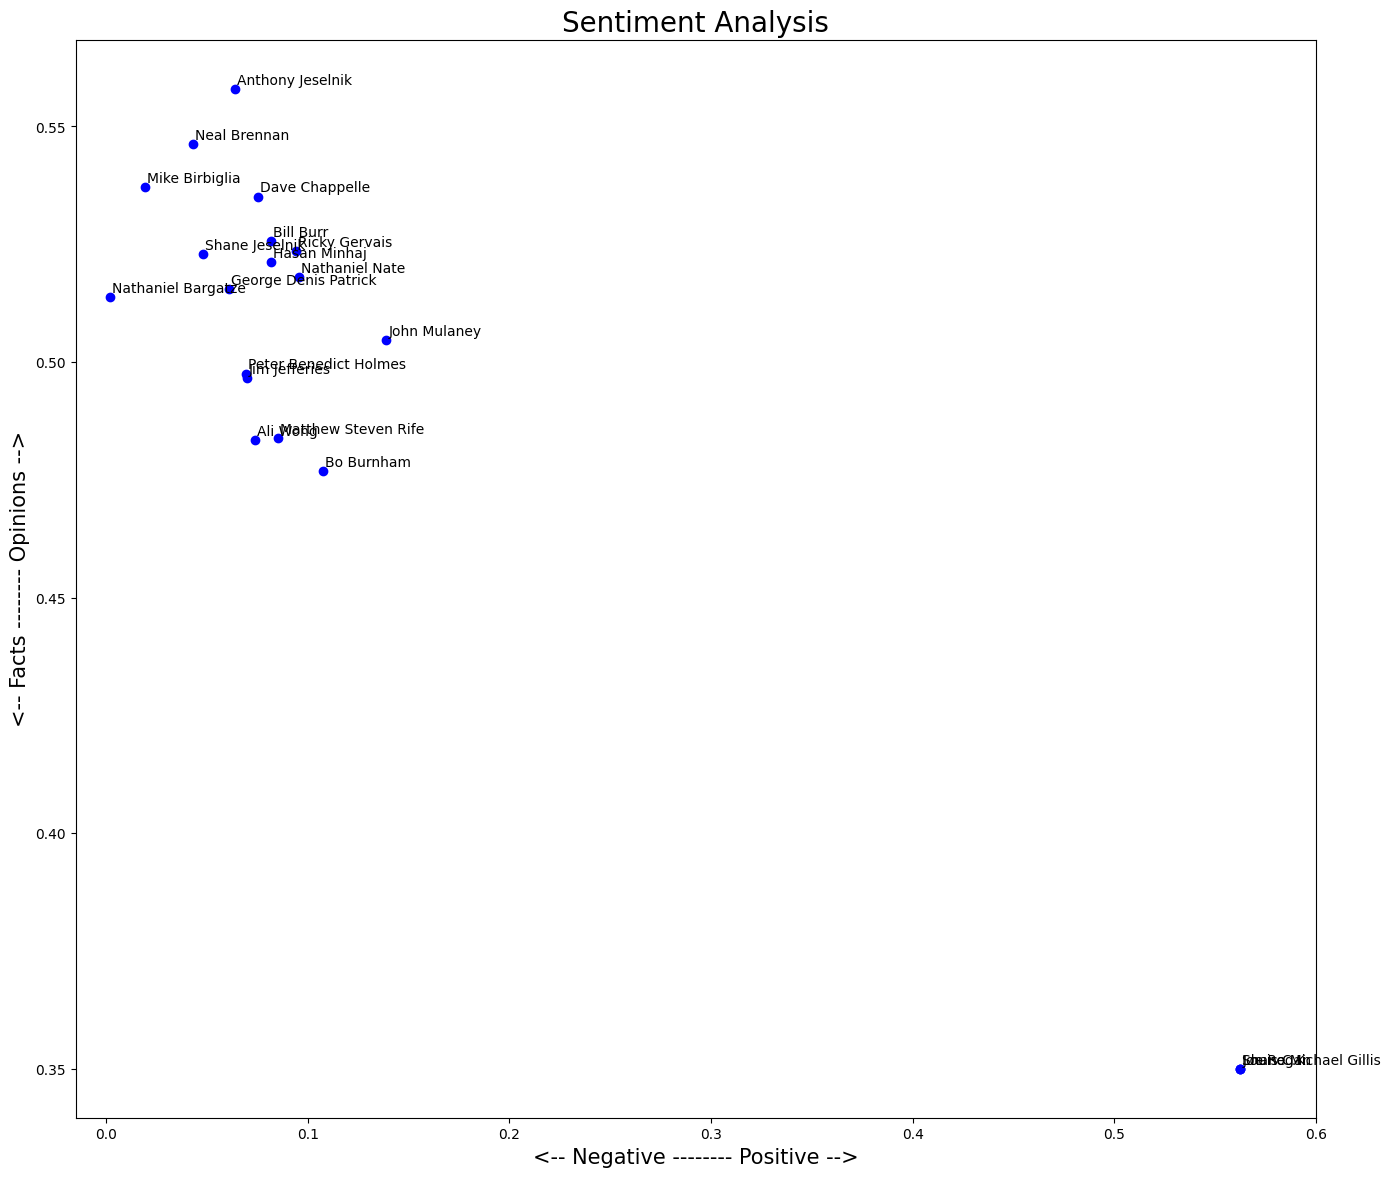

In [78]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 14]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.015, .6) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [79]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [80]:
# Let's take a look at our data again
data

,transcript,full_name,polarity,subjectivity
George,© 2024 Scraps from the Loft. All rights reser...,Louis C.K.,0.562500,0.350000
Jeselnik,[crowd cheering] Thank you all for coming to t...,Dave Chappelle,0.075116,0.535118
Matthew,"In his second hour-long comedy special, “Matth...",Ricky Gervais,0.094150,0.523452
Nate,"Your Friend, Nate Bargatze (2024)\nGenre: Come...",Bo Burnham,0.107638,0.476870
Nathaniel,"Original air date: October 28, 2023 Ladies and...",Bill Burr,0.081754,0.525686
Neal,[dark music playing] [Neal] So if you’re watch...,Jim Jefferies,0.069743,0.496575
Peter,[audience cheering and applauding] Hello! Hell...,John Mulaney,0.138919,0.504630
Shane,"Shane Gillis’ debut stand-up comedy special, r...",Hasan Minhaj,0.081786,0.521253
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong,0.073699,0.483335
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik,0.063952,0.557994


In [81]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[[' © 2024 Sc',
  'raps from ',
  'the Loft. ',
  'All rights',
  ' reserved.',
  ' Get the b',
  'est articl',
  'es once a ',
  'week direc',
  'tly to you'],
 ['[crowd cheering] Thank you all for coming to the show tonight. I do appreciate it. In case you guys don’t know why I’m on tour right now, as of a couple of months ago, I’ve been doing stand-up comedy for 20 years. [audience cheers] Yeah. Thank you. Thank you. Thank you. My agent said to me, “Anthony, 20 years is a major accomplishment for any comedian.” “You gotta celebrate.” “Pick some of your favorite cities, go perform for them.” And I said, “No, thank you.” [audience chuckles] “I’d rather go to Milwaukee.” [audience laughs and applauds] But look… [audience chuckles] …I am excited to be here tonight. I’ve got great news. After 20 years of stand-up comedy, just last weekend, I finally perfected my act. [audience chuckles] Don’t get me wrong. I thought it was perfect before. [audience chuckles] Ran into an audience member a

In [82]:
# The list has 10 elements, one for each transcript
len(list_pieces)

20

In [83]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [84]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.17995800495800496,
  0.04588192419825071,
  0.08890016233766233,
  0.07426803751803751,
  0.09519995032290111,
  0.11104356636271526,
  0.052760486639796995,
  -0.0532000196772924,
  0.029946388488055135,
  0.12250714563214561],
 [0.24338519957054447,
  0.07507366902103745,
  -0.016513600625750156,
  0.06460993392572341,
  0.050034988905956645,
  0.20322298072298073,
  0.006781670390541355,
  0.08077707882395381,
  0.06749491669946216,
  0.13521374458874458],
 [0.18571969696969692,
  0.13315018315018315,
  0.15246536796536797,
  0.12715814608671752,
  0.13940185830429733,
  0.06706640771709266,
  -0.08472222222222223,
  0.08455202535559678,
  0.09174272486772485,
  0.1697338629672299],
 [-0.0759853404171586,
  0.06761111111111111,
  0.11409171075837743,
  0.04444444444444443,
  0.0196969696969697,
  -0.3125,
  0.22781385281385277,
  0.11764455782312926,
  0.29935064935064937,
  0.12750626566416043],
 [0.07789844509232263,
  0.112

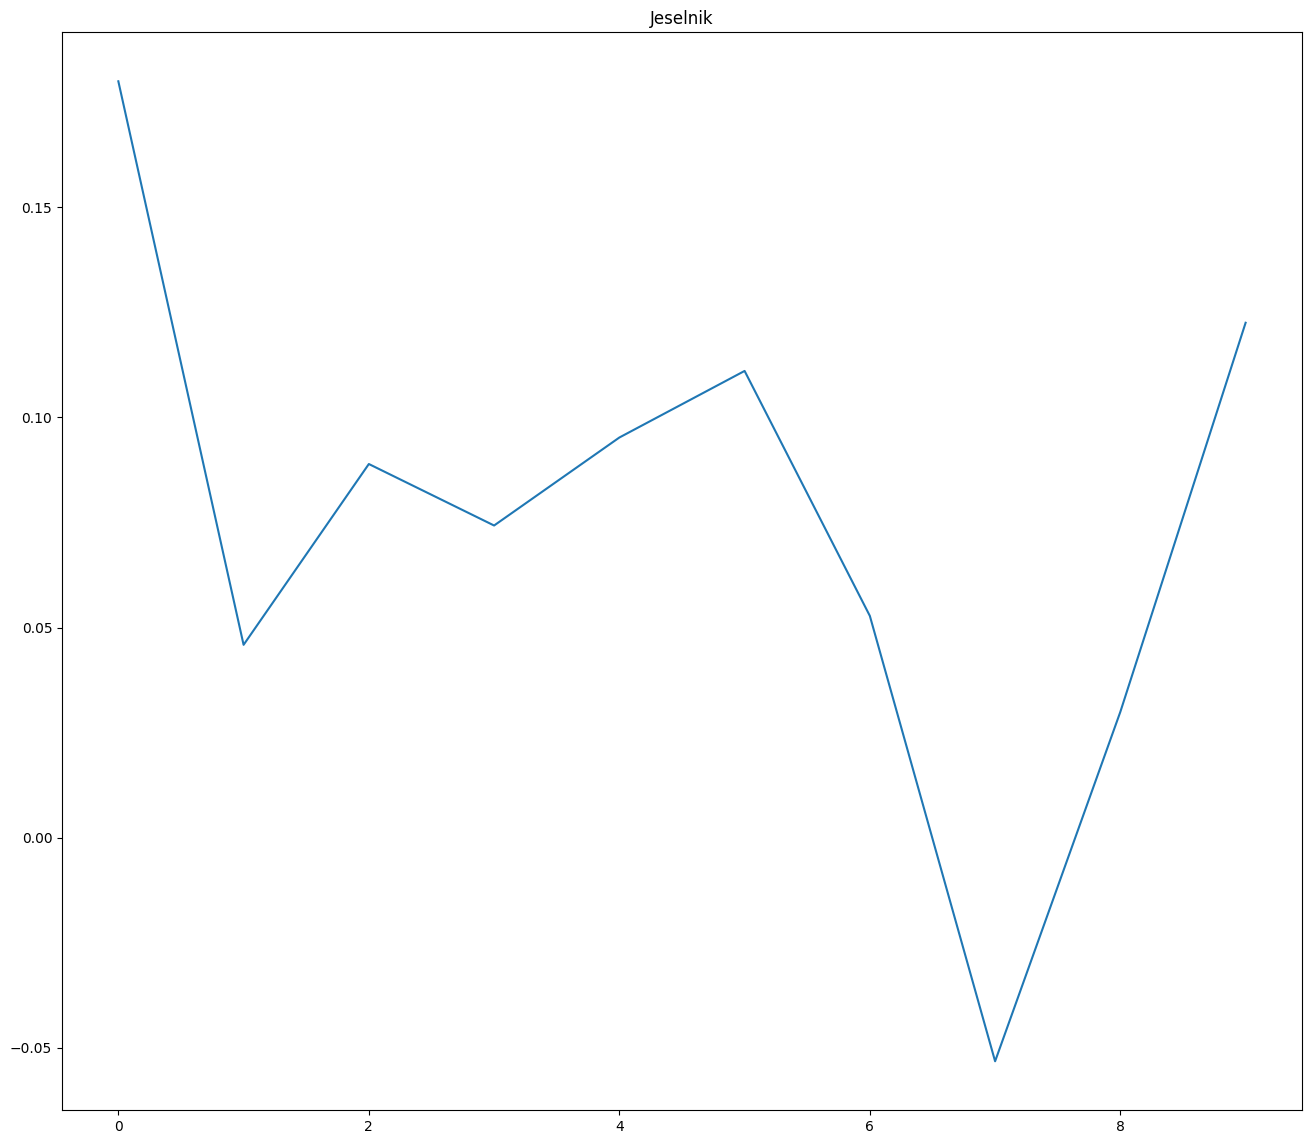

In [85]:
# Show the plot for one comedian
plt.plot(polarity_transcript[1])
plt.title(data['full_name'].index[1])
plt.show()

C:\Users\adity\AppData\Local\Temp\ipykernel_23196\2873325229.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(data['full_name'][index])


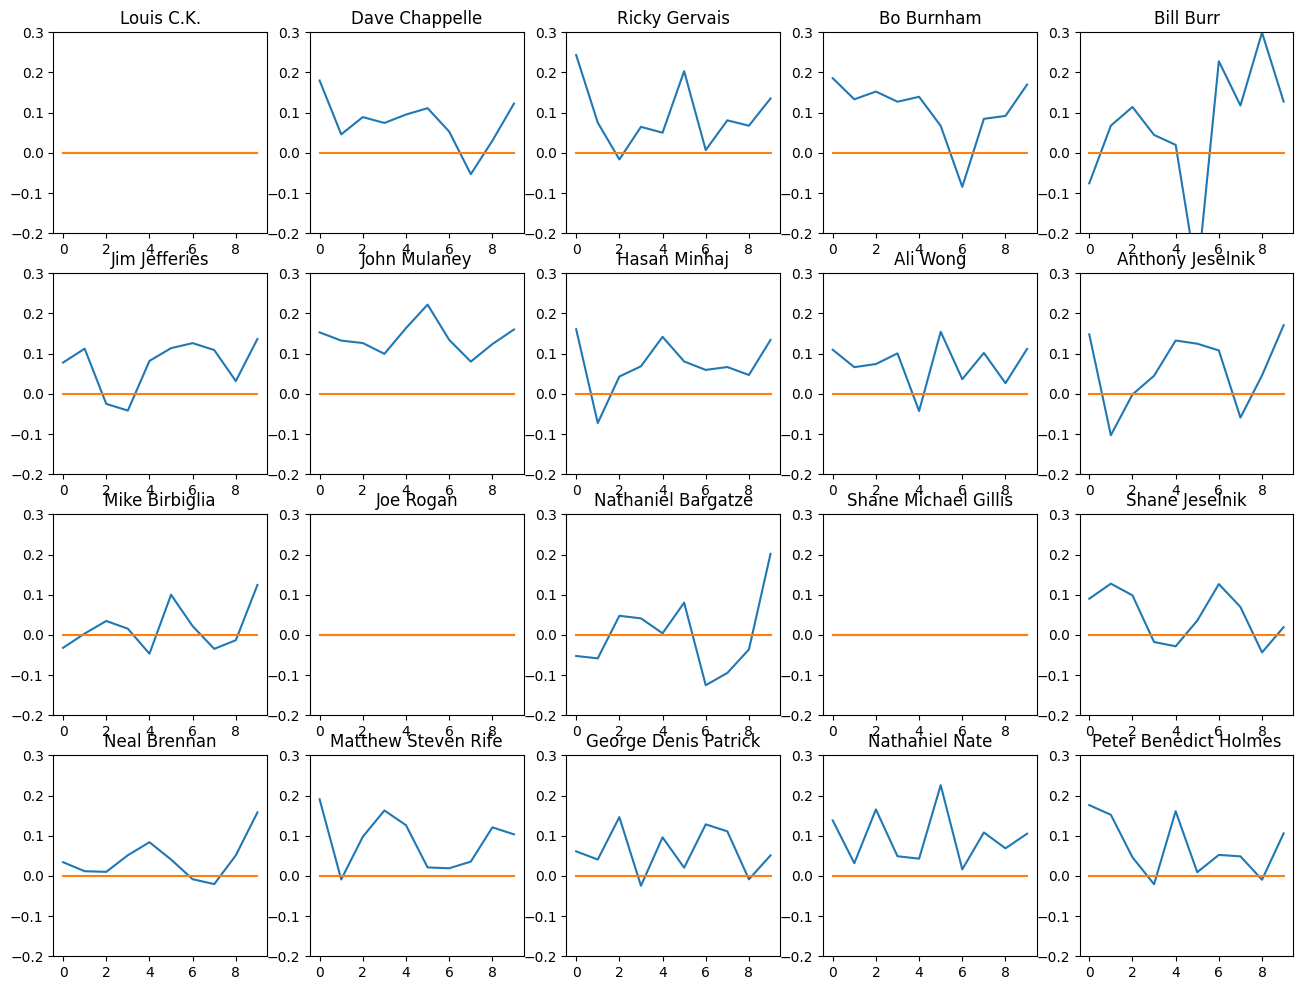

In [86]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(4, 5, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

Nathaniel Nate stays positive throughout his routine. Similar comedians are John Mulaney and Matthew Steven Rife.

On the other hand, you have some pretty different patterns here like Hasan Minhaj who gets happier as time passes and Mike Birbigilia who has some pretty down moments in his routine.

## Additional Exercises

1. Modify the number of sections the comedy routine is split into and see how the charts over time change.

In [87]:
# Split each routine into 15 parts
import numpy as np
import math

def split_text(text, n=15):
    '''Takes in a string of text and splits into n equal parts, with a default of 15 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [88]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    


In [89]:
# The list has 20 elements, one for each transcript
len(list_pieces)


20

In [90]:
# Each transcript has been split into 15 pieces of text
len(list_pieces[0])

15

In [91]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0],
 [0.18695715660001372,
  0.11221988795518208,
  0.0462121212121212,
  0.09210164835164834,
  0.08964646464646461,
  0.0669462481962482,
  0.02614607614607614,
  0.26802083333333326,
  -0.03571428571428572,
  0.10612905112905113,
  -0.06989758209270405,
  -0.014236111111111107,
  0.043751803751803736,
  -0.019141146918924698,
  0.17955673955673948],
 [0.2529972974180292,
  0.17502564709595955,
  0.052573260073260096,
  0.009913775582789667,
  -0.10291319377140272,
  0.16503584956709957,
  0.06518291170634921,
  0.1106017659589088,
  0.2117943465264894,
  0.004413483843863581,
  0.02731967787114845,
  0.08752223803593663,
  0.03415017522160379,
  0.17053648732220164,
  0.09495310245310243],
 [0.2152380952380952,
  0.09650974025974028,
  0.15305662805662804,
  0.10889413616686346,
  0.18195238095238092,
  0.14181160342925048,
  0.15780677655677655,
  0.10844897959183672,
  0.051181763728933544,
  -0.015575396825

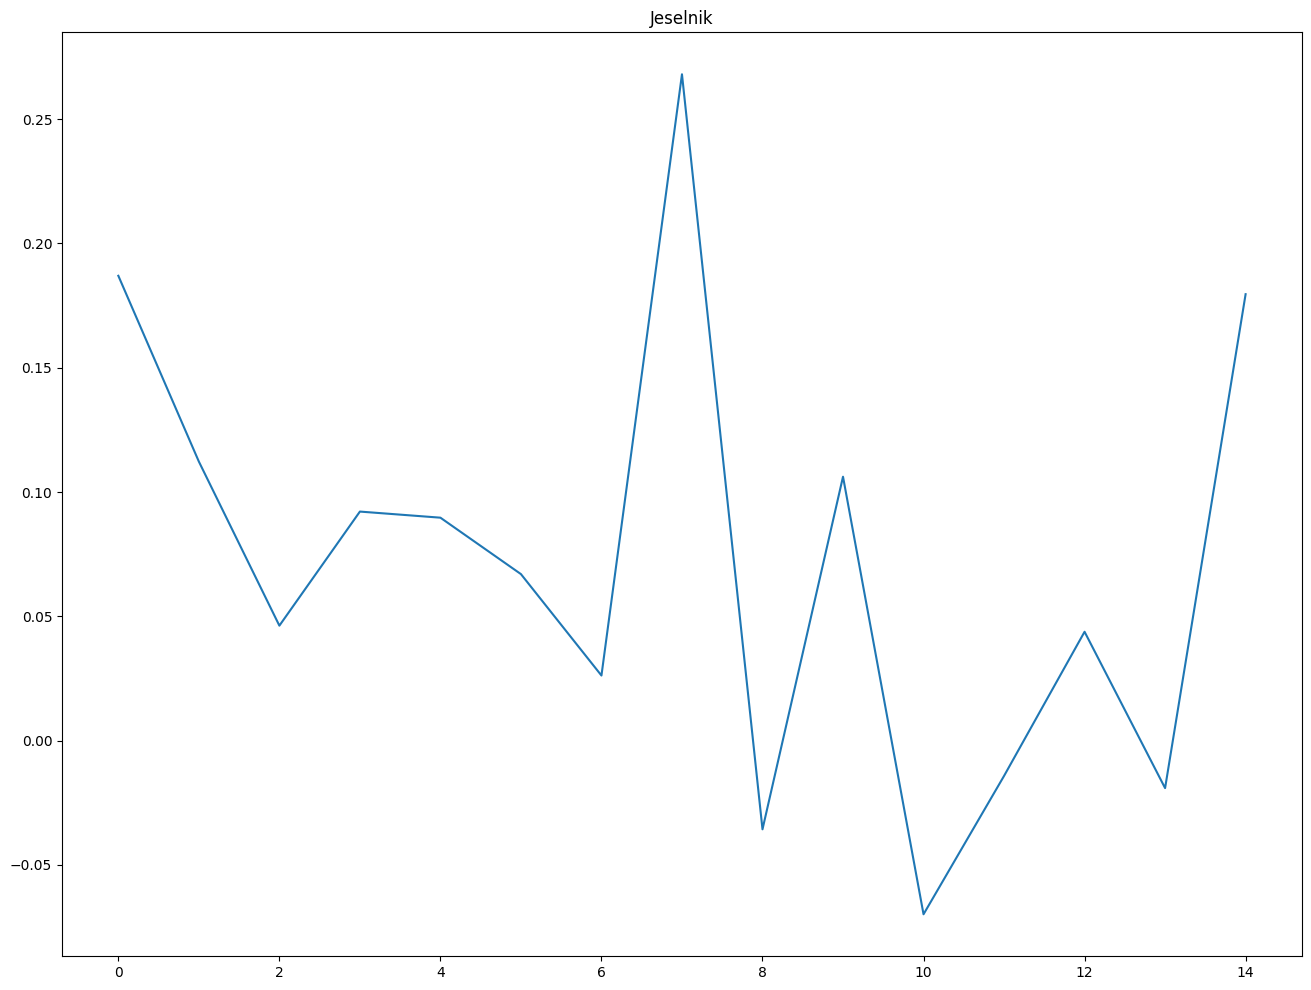

In [92]:
# Show the plot for one comedian
plt.plot(polarity_transcript[1])
plt.title(data['full_name'].index[1])
plt.show()

C:\Users\adity\AppData\Local\Temp\ipykernel_23196\2964778014.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(data['full_name'][index])


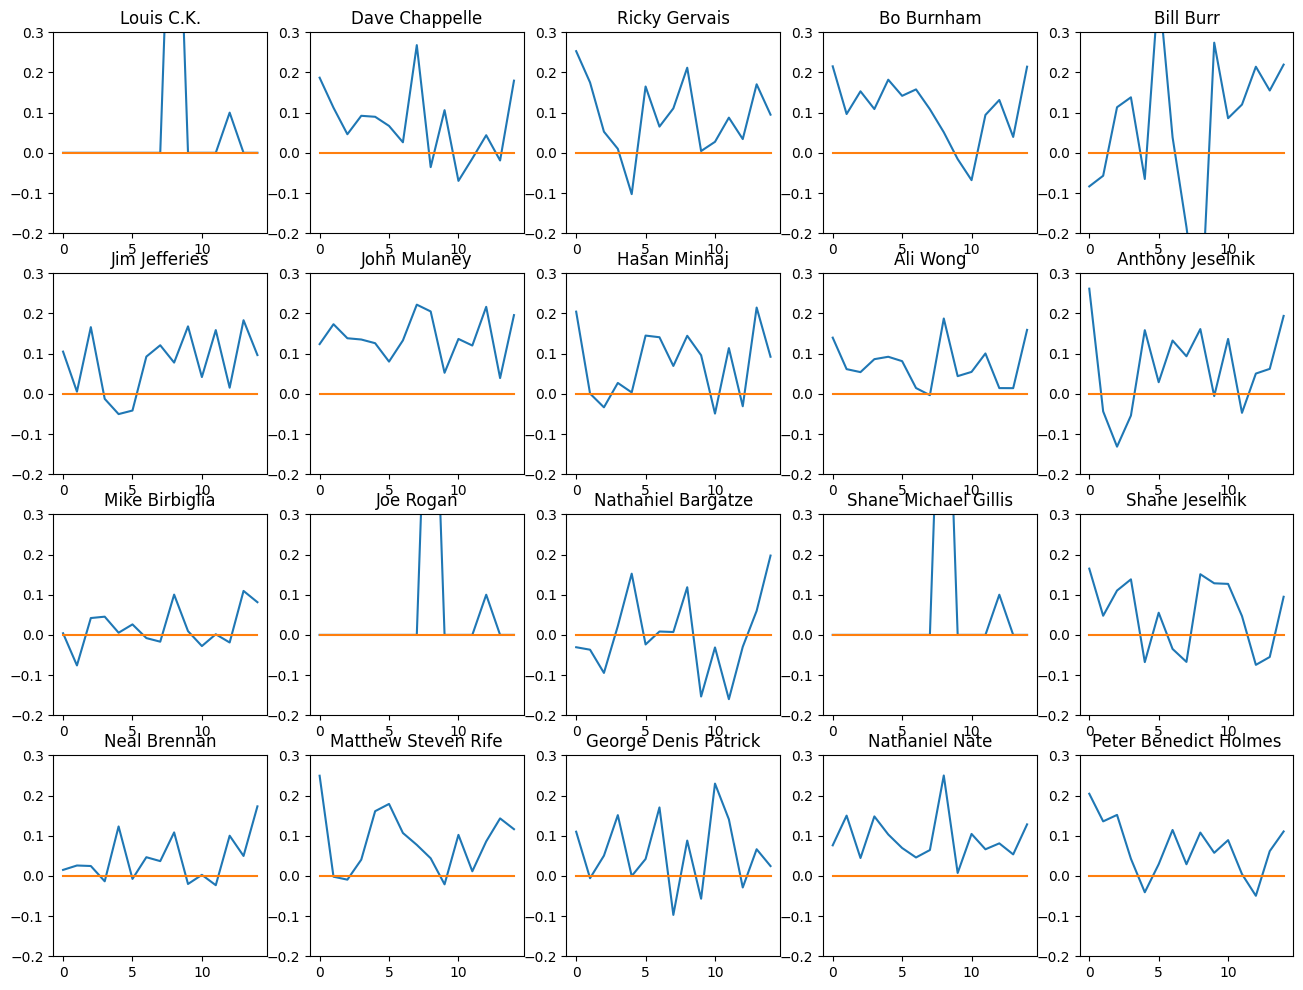

In [93]:
# Show the plot for all comedians

plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(4, 5, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,15), np.zeros(15))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

Sections (n)	Effect on Analysis
5	Smooth, general trend but lacks detail
10	Balanced view, good for overall trends
15	More detailed, shows finer sentiment changes
20	High granularity but can be noisy

Higher n (15) gives a more detailed, fluctuating sentiment trend.
Lower n (10) smooths the variations, making it easier to observe overall sentiment flow but with less granularity.

Most comedians fall in the positive polarity range, indicating generally uplifting or humorous content.


Shane Jeselnik	A mix of positive and neutral, indicating a fun, energetic performance style.
Nathaniel Bargatze	High variation, reflecting his energetic, aggressive delivery. Jumps between negative and positive.
Nathaniel Nate is always positive.


In [94]:
# Calculate the polarity for each piece of text

sub_transcript = []
for lp in list_pieces:
    sub_piece = []
    for p in lp:
        sub_piece.append(TextBlob(p).sentiment.subjectivity)
    sub_transcript.append(sub_piece)
    
sub_transcript

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.0, 0.0, 0.0, 0.4, 0.0, 0.0],
 [0.5572734144162717,
  0.5031512605042016,
  0.5744949494949495,
  0.5057234432234433,
  0.46064491064491064,
  0.5152464494569757,
  0.4933908683908685,
  0.5583531746031746,
  0.5296817765567765,
  0.5416211341211341,
  0.6187132650547285,
  0.5520833333333334,
  0.5151659451659452,
  0.5743820479931592,
  0.5077040552040553],
 [0.5939705619583671,
  0.5344078621031747,
  0.5321245421245421,
  0.4770428124301364,
  0.648009681032069,
  0.4928113162878788,
  0.49478208423520936,
  0.5225907029478457,
  0.5228323197966057,
  0.48306633591443715,
  0.6123336834733891,
  0.4846112791318271,
  0.5101113172541744,
  0.48254483611626464,
  0.4722537277537277],
 [0.5416971916971918,
  0.4300324675324676,
  0.6187698412698414,
  0.3629804538895448,
  0.4445079365079366,
  0.49219739410915886,
  0.489217032967033,
  0.5066462585034013,
  0.45329630537177706,
  0.3590277777777778,
  0.44296218487394956,
  0.541012876

C:\Users\adity\AppData\Local\Temp\ipykernel_23196\4146985907.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(data['full_name'][index])


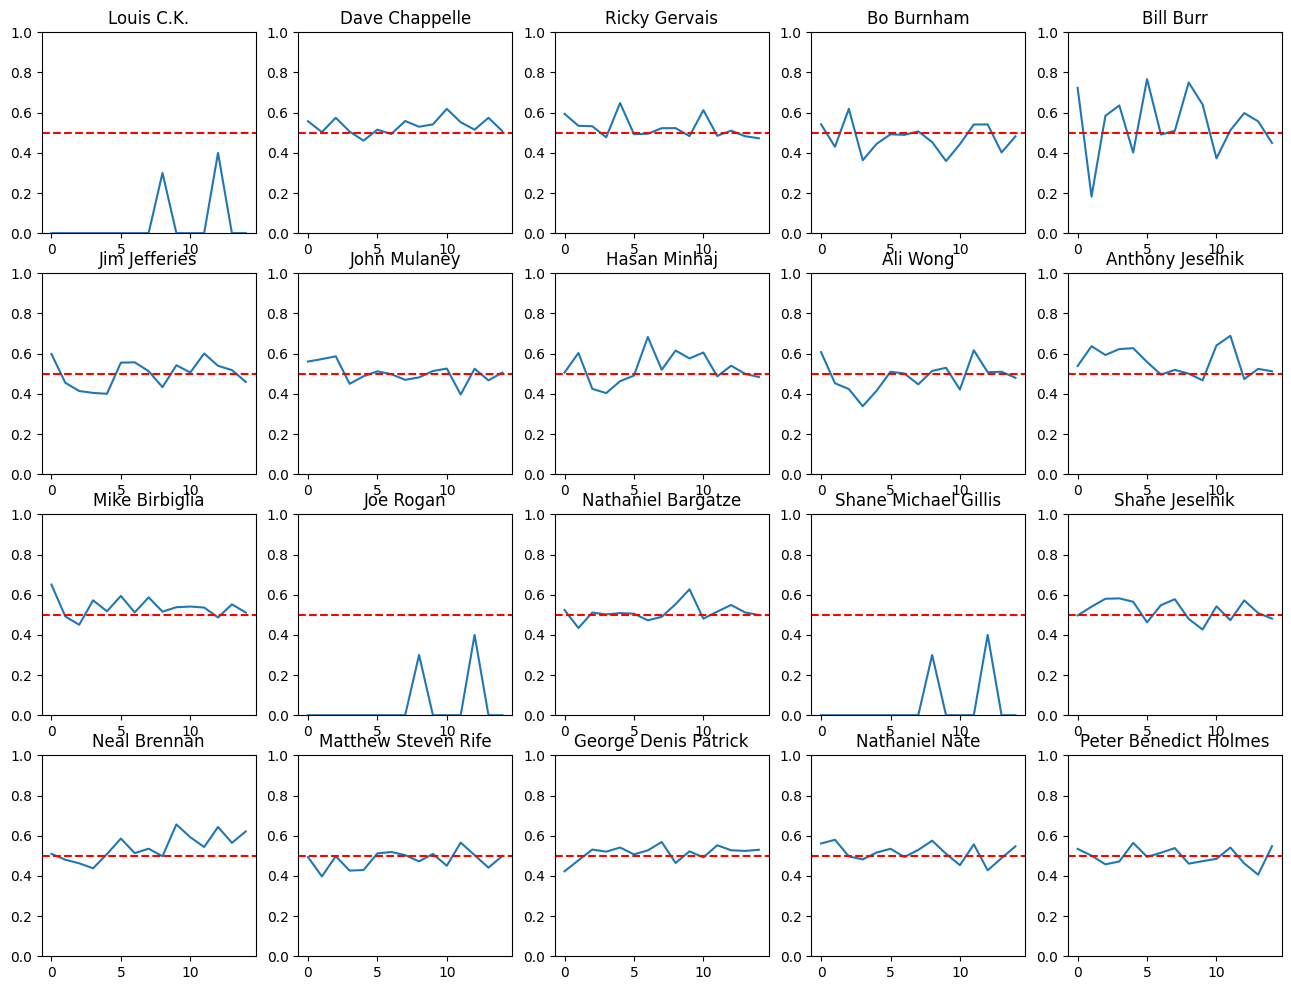

In [95]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(4, 5, index+1)
    plt.plot(sub_transcript[index])
    plt.axhline(y=0.5, color='r', linestyle='--')
    plt.title(data['full_name'][index])
    plt.ylim(ymin=0, ymax=1)
    
plt.show()

Mike Birbigilia, Dave Chappelle says more opinion than facts.
Bo Burnham, Matthew Steven Rife says more fact than opinion.
Peter is quite balanced.